# Classification Undersampling Experiments

This notebook runs undersampling experiments for 2D classification with IT and GL uncertainty decompositions.

The experiment evaluates how uncertainty estimates behave when training data near decision boundaries is undersampled.

Models tested:
- MC Dropout (IT and GL)
- Deep Ensemble (IT and GL)
- BNN (IT and GL)

## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
from pathlib import Path

# Add parent directory to path to import utils
project_root = Path.cwd().parent if Path.cwd().name == 'Experiments' else Path.cwd()
sys.path.insert(0, str(project_root))

# Setup results directory
results_dir = project_root / "results" / "classification" / "undersampling"
results_dir.mkdir(parents=True, exist_ok=True)
plots_dir = results_dir / "plots"
plots_dir.mkdir(exist_ok=True)
stats_dir = results_dir / "statistics"
stats_dir.mkdir(exist_ok=True)
outputs_dir = results_dir / "outputs"
outputs_dir.mkdir(exist_ok=True)

print(f"Results will be saved to: {results_dir}")

# Import classification experiment utilities
from utils.classification_data import simulate_dataset
from utils.classification_experiments import (
    run_mc_dropout_it_undersampling_experiment,
    run_mc_dropout_gl_undersampling_experiment,
    run_deep_ensemble_it_undersampling_experiment,
    run_deep_ensemble_gl_undersampling_experiment,
    run_bnn_it_undersampling_experiment,
    run_bnn_gl_undersampling_experiment,
)
from utils.device import get_device
import utils.results_save as results_save_module

# Set module-level directories
results_save_module.plots_dir = plots_dir
results_save_module.stats_dir = stats_dir
results_save_module.outputs_dir = outputs_dir

Results will be saved to: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\undersampling


## Device Setup

In [4]:
device = get_device()
print(f"Using device: {device}")

CUDA not available. Using CPU.
Using device: cpu


## Data Generation Setup

Configure the base dataset for undersampling experiments.

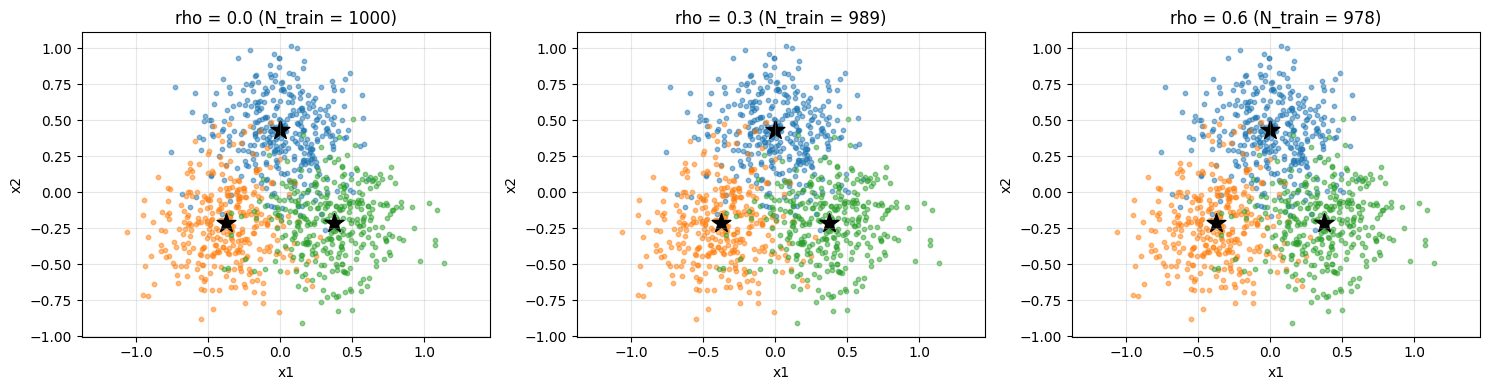

In [5]:
# Reproducibility
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

# Base configuration (undersampling will be varied)
base_cfg = {
    "N_train": 1000,
    "N_test": 500,
    "num_classes": 3,
    "blob_sigma": 0.25,
    "tau": 0.2,
    "eta": 0.0,
    "sigma_in": 0.0,
    "seed": seed,
    # Model hyperparameters
    "input_dim": 2,
    "epochs": 300,
    "batch_size": 32,
    "lr": 1e-3,
    "dropout_p": 0.25,
    "mc_samples": 50,
    "gl_samples": 100,
    "K": 5,
    "hidden_width": 32,
    "weight_scale": 1.0,
    "warmup": 200,
    "samples": 200,
    "chains": 1,
}

# Visualize effect of undersampling
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
rho_examples = [0.0, 0.3, 0.6]

for ax, rho in zip(axes, rho_examples):
    cfg = dict(base_cfg)
    cfg["undersampling"] = {"boundary_band": {"enabled": True, "d0": 0.15, "rho": rho}}
    X_train, y_train, X_test, y_test, meta = simulate_dataset(cfg)
    
    colors = ['tab:blue', 'tab:orange', 'tab:green']
    for c in range(3):
        mask = y_train == c
        ax.scatter(X_train[mask, 0], X_train[mask, 1], c=colors[c], alpha=0.5, s=10)
    ax.scatter(meta['centers'][:, 0], meta['centers'][:, 1], c='black', marker='*', s=200)
    ax.set_title(f'rho = {rho} (N_train = {len(X_train)})')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.axis('equal')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Set Parameters

In [6]:
# Undersampling rho values to test (fraction of boundary band samples to remove)
rho_values = [0.0, 0.8]

# For BNN, use fewer values due to computational cost
rho_values_bnn = [0.0, 0.4, 0.8]

print(f"Undersampling rho values: {rho_values}")
print(f"Undersampling rho values (BNN): {rho_values_bnn}")

Undersampling rho values: [0.0, 0.8]
Undersampling rho values (BNN): [0.0, 0.4, 0.8]



Training mc_dropout_it (IT) - undersampling_rho_0.0
CUDA not available. Using CPU.
[MC Dropout IT] Epoch 100/300 - avg loss 0.3581
[MC Dropout IT] Epoch 200/300 - avg loss 0.3377
[MC Dropout IT] Epoch 300/300 - avg loss 0.3290
CUDA not available. Using CPU.
CUDA not available. Using CPU.
[MC Dropout IT] Epoch 100/300 - avg loss 0.3514
[MC Dropout IT] Epoch 200/300 - avg loss 0.3376
[MC Dropout IT] Epoch 300/300 - avg loss 0.3358
CUDA not available. Using CPU.
  Train Accuracy: 0.8830, ECE: 0.0210
  Mean TU: 0.2481 (norm: 0.2263), AU: 0.2068 (norm: 0.1934), EU: 0.0413 (norm: 0.1295)
Saved classification outputs: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\undersampling\outputs\classification\undersampling\mc_dropout_it\mc_dropout_it_undersampling_rho_0.0_outputs.npz
Saved plot: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\

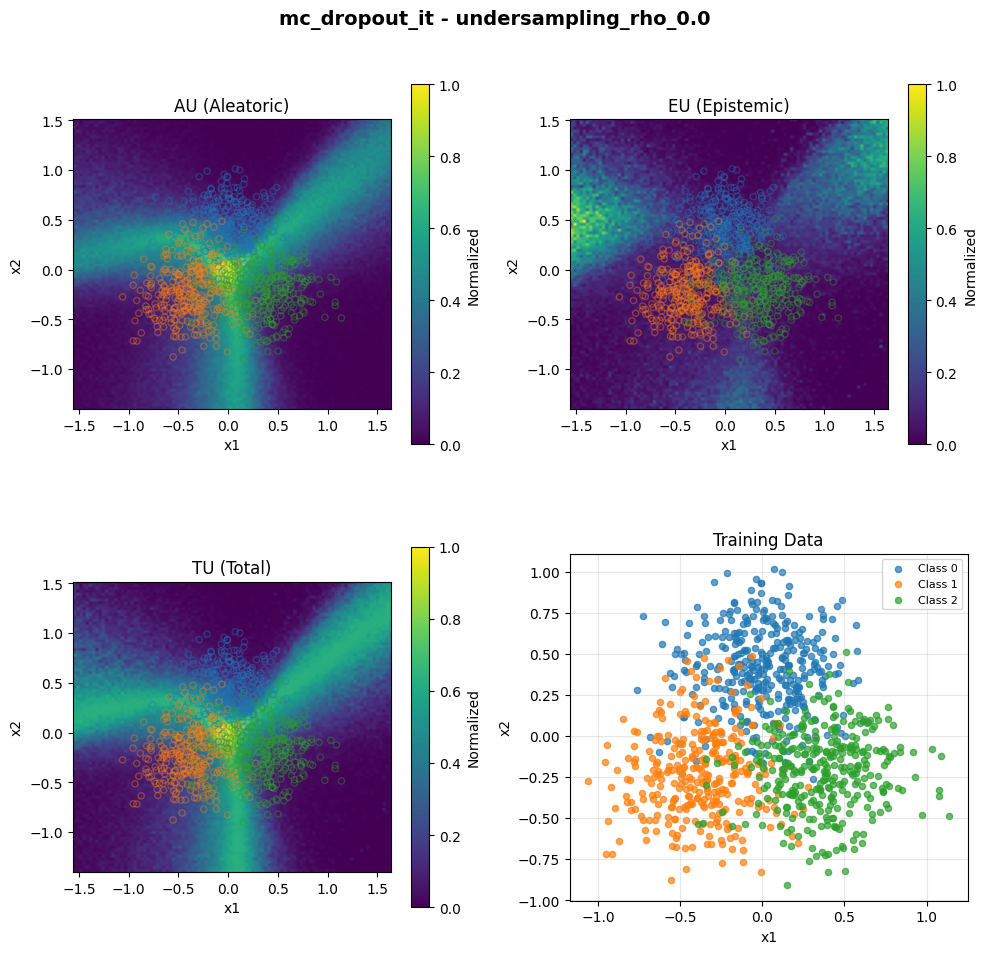


Training mc_dropout_it (IT) - undersampling_rho_0.8
CUDA not available. Using CPU.
[MC Dropout IT] Epoch 100/300 - avg loss 0.3449
[MC Dropout IT] Epoch 200/300 - avg loss 0.3108
[MC Dropout IT] Epoch 300/300 - avg loss 0.3183
CUDA not available. Using CPU.
CUDA not available. Using CPU.
[MC Dropout IT] Epoch 100/300 - avg loss 0.3281
[MC Dropout IT] Epoch 200/300 - avg loss 0.3222
[MC Dropout IT] Epoch 300/300 - avg loss 0.3078
CUDA not available. Using CPU.
  Train Accuracy: 0.8939, ECE: 0.0172
  Mean TU: 0.2193 (norm: 0.1998), AU: 0.1843 (norm: 0.1724), EU: 0.0350 (norm: 0.0923)
Saved classification outputs: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\undersampling\outputs\classification\undersampling\mc_dropout_it\mc_dropout_it_undersampling_rho_0.8_outputs.npz
Saved plot: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\

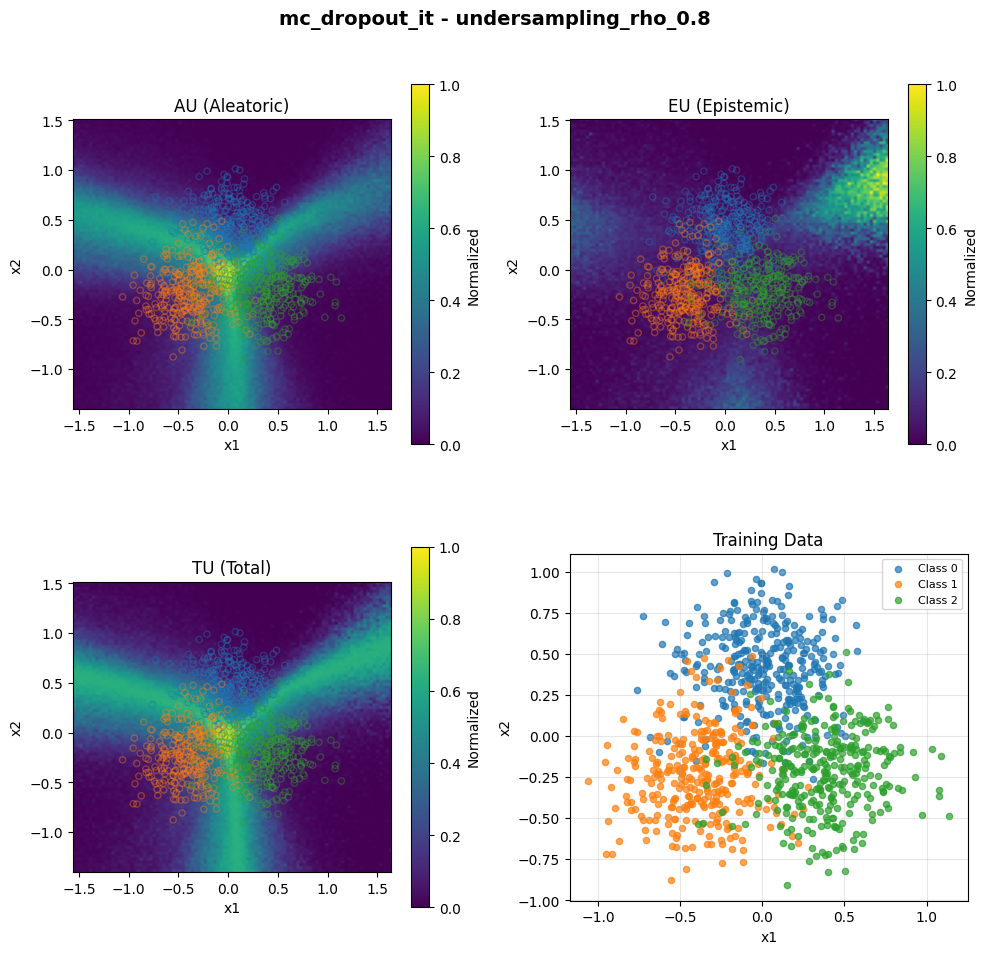

Saved plot: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\undersampling\plots\classification\undersampling\mc_dropout_it\mc_dropout_it_IT_uncertainty_(normalized)_vs_rho.png


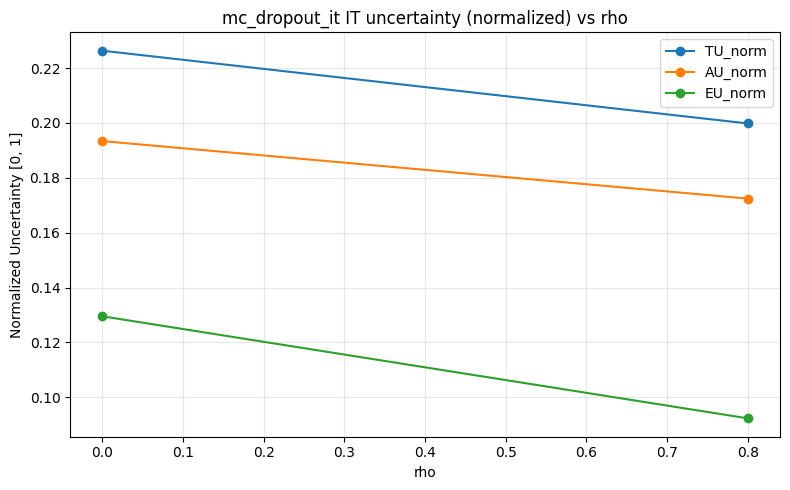

Saved plot: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\undersampling\plots\classification\undersampling\mc_dropout_it\mc_dropout_it_metrics_vs_rho.png


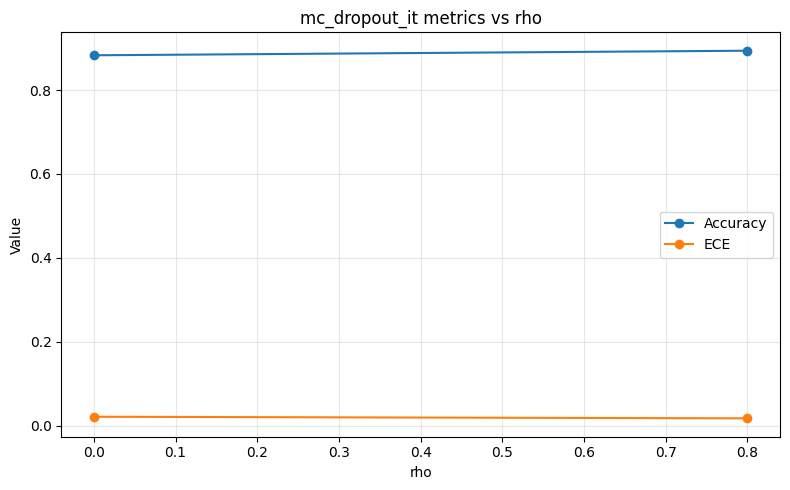

Saved plot: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\undersampling\plots\classification\undersampling\mc_dropout_it\mc_dropout_it_AU-EU_correlation_vs_rho.png


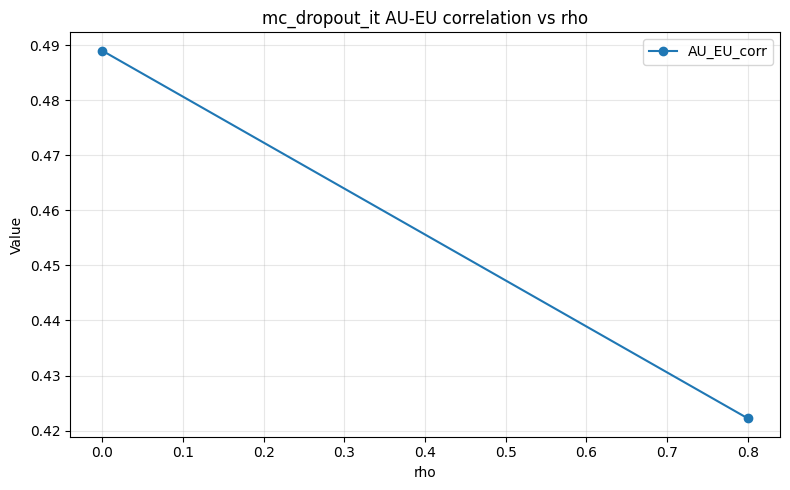

Saved statistics: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\undersampling\statistics\classification\undersampling\mc_dropout_it\mc_dropout_it_rho_summary.xlsx


In [7]:
results_mc_dropout_it = run_mc_dropout_it_undersampling_experiment(
    base_cfg=base_cfg,
    rho_values=rho_values,
    seed=seed,
)

In [ ]:
results_mc_dropout_gl = run_mc_dropout_gl_undersampling_experiment(
    base_cfg=base_cfg,
    rho_values=rho_values,
    seed=seed,
)

In [ ]:
results_deep_ensemble_it = run_deep_ensemble_it_undersampling_experiment(
    base_cfg=base_cfg,
    rho_values=rho_values,
    seed=seed,
)

In [ ]:
results_deep_ensemble_gl = run_deep_ensemble_gl_undersampling_experiment(
    base_cfg=base_cfg,
    rho_values=rho_values,
    seed=seed,
)

In [ ]:
# BNN is computationally expensive
# Uncomment to run:
# results_bnn_it = run_bnn_it_undersampling_experiment(
#     base_cfg=base_cfg,
#     rho_values=rho_values_bnn,
#     seed=seed,
# )

In [ ]:
# BNN is computationally expensive
# Uncomment to run:
# results_bnn_gl = run_bnn_gl_undersampling_experiment(
#     base_cfg=base_cfg,
#     rho_values=rho_values_bnn,
#     seed=seed,
# )